# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 20-80 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [115]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [117]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['price', 'date'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=.80,test_size=.20,random_state=42)
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((17290, 19), (4323, 19), (17290,), (4323,))

In [118]:
target = 'bedrooms'
X_train['Prediction bedrooms'] = X_train[target].mean()
X_train['Error bedrooms'] = X_train['Prediction bedrooms'] - X_train[target]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [119]:
X_train.T

,6325,13473,17614,16970,20868,8993,10432,10163,17889,13246,7958,14227,5564,2154,5701,21058,6346,2298,3168,9405,8704,4767,19979,9805,896,7267,20357,18845,707,9138,10443,20729,19248,10863,14563,205,7068,11448,8029,16494,1791,17395,2677,3538,17853,16149,16627,6392,1005,13685,...,12206,17159,15787,2612,11016,10233,8433,10253,10555,8792,10627,14502,8838,3890,3556,11394,17912,1267,1899,21042,3005,19118,189,2747,18431,18942,8666,6396,19769,20939,17568,6420,5051,5311,2433,769,1685,8322,16023,11363,14423,4426,16850,6265,11284,11964,21575,5390,860,15795
id,5.467910e+09,9.331801e+09,2.407000e+09,5.466700e+09,3.026059e+09,1.523069e+09,3.876312e+09,8.832900e+09,9.238901e+09,4.142450e+09,9.282800e+09,5.379801e+09,2.459950e+09,4.435001e+09,1.552800e+09,7.549801e+09,9.828200e+09,6.345000e+09,7.129304e+09,4.302201e+09,2.450500e+09,5.166700e+09,1.085624e+09,1.123049e+09,8.566100e+09,1.774001e+09,9.492500e+09,6.865305e+08,4.022908e+09,6.052401e+09,3.438503e+09,3.758900e+09,1.645001e+09,8.099200e+09,7.635801e+09,3.456000e+09,2.025059e+09,2.624039e+09,3.348401e+09,6.633900e+09,2.600001e+09,9.414700e+09,3.204801e+09,1.844500e+09,4.137011e+09,8.564950e+09,1.338800e+09,4.058802e+09,4.610047e+08,3.123059e+09,...,3.964400e+09,6.072000e+09,9.512500e+09,1.796250e+09,8.854000e+09,6.139800e+09,1.721801e+09,2.422049e+09,1.522039e+09,1.370801e+09,3.585300e+09,6.190000e+09,2.524049e+09,8.819900e+09,6.145602e+09,2.596009e+08,9.158100e+09,4.310702e+09,2.548100e+09,1.389600e+09,2.123700e+09,7.663701e+09,1.115810e+09,7.215730e+09,5.631500e+09,4.190000e+08,4.250491e+08,8.651431e+09,6.781200e+09,1.778501e+09,1.561900e+09,5.104532e+09,3.444910e+09,2.768101e+09,6.413100e+09,1.196003e+09,4.055701e+09,1.443500e+09,1.232001e+09,7.701961e+09,9.543000e+09,7.781600e+09,7.215721e+09,6.600220e+09,5.078400e+09,5.272200e+09,9.578501e+09,7.202350e+09,1.723049e+09,6.147650e+09
bedrooms,3.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,5.000000e+00,3.000000e+00,3.000000e+00,5.000000e+00,3.000000e+00,2.000000e+00,5.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,4.000000e+00,3.000000e+00,5.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,4.000000e+00,3.000000e+00,5.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,2.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,5.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,2.000000e+00,4.000000e+00,4.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,1.000000e+00,4.000000e+00
bathrooms,1.750000e+00,1.000000e+00,1.000000e+00,2.250000e+00,2.500000e+00,1.750000e+00,2.750000e+00,2.250000e+00,1.750000e+00,2.500000e+00,1.750000e+00,3.000000e+00,2.000000e+00,1.000000e+00,2.750000e+00,3.250000e+00,1.000000e+00,3.000000e+00,2.000000e+00,1.750000e+00,1.750000e+00,2.250000e+00,2.500000e+00,1.750000e+00,2.500000e+00,2.750000e+00,2.750000e+00,1.750000e+00,1.750000e+00,1.000000e+00,2.500000e+00,3.250000e+00,2.500000e+00,1.500000e+00,1.500000e+00,1.750000e+00,1.750000e+00,1.000000e+00,1.750000e+00,2.500000e+00,2.250000e+00,3.000000e+00,1.750000e+00,1.000000e+00,2.500000e+00,2.500000e+00,2.500000e+00,2.500000e+00,2.000000e+00,2.500000e+00,...,1.750000e+00,2.750000e+00,1.750000e+00,2.500000e+00,3.000000e+00,2.500000e+00,1.000000e+00,1.000000e+00,4.250000e+00,2.500000e+00,1.750000e+00,3.000000e+00,2.250000e+

In [120]:
X_train['Absolute Error bedrooms'] = X_train['Error bedrooms'].abs()
X_train['Absolute Error bedrooms'].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


12690.274725274727

# Root Mean Squared Error

In [121]:
X_train['Absolute Error bedrooms'].mean()

0.7339661495242927

In [122]:
mean_absolute_error(y_true=X_train[target], y_pred=X_train['Prediction bedrooms'])

0.7339661495242757

# R-Squared

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [124]:
r2_score(y_true=X_train[target],y_pred=X_train['Prediction bedrooms'])

0.0

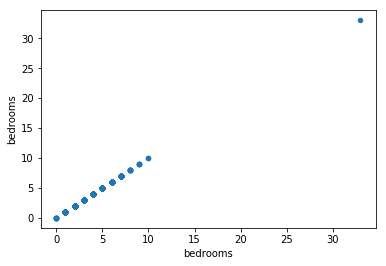

In [125]:
feature = "bedrooms"
X_train.plot(x=feature, y=target, kind='scatter');

In [0]:
from sklearn.linear_model import LinearRegression

In [128]:
feature = "bedrooms"
X = df[[feature]]
y = df[target]

X.shape, y.shape

((21613, 1), (21613,))

In [129]:
model = LinearRegression()#skitlearn - instantiating model, calling fit method, 
#in supervised learing, there are x and y instead of just x in clustering and dimensionality reduction.
#x is capitalized because it is a matrix
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [130]:
model.coef_, model.intercept_

(array([1.]), 1.2878587085651816e-14)

In [133]:

m = 1
b = 0
X_train['Prediction bedrooms'] = m * X_train[feature] + b #mx+b
X_train['Error bedrooms'] = X_train['Prediction bedrooms'] - X_train[target]
X_train['Absolute Error bedrooms'] = X_train['Error bedrooms'].abs()
X_train['Absolute Error bedrooms'].sum()

0

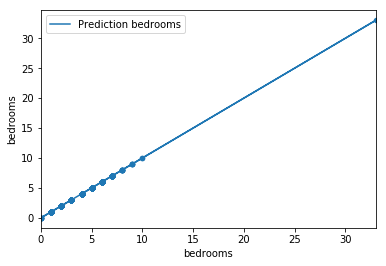

In [134]:

ax = X_train.plot(x=feature, y=target, kind='scatter')
X_train.plot(x=feature, y='Prediction bedrooms', kind='line', ax=ax);

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 80-20 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [49]:
target2 = 'sqft_lot'
X_train['Prediction sqft_lot'] = X_train[target].mean()
X_train['Error sqft_lot'] = X_train['Prediction sqft_lot'] - X_train[target]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
X_train['Absolute Error sqft_lot'] = X_train['Error sqft_lot'].abs()
X_train['Absolute Error sqft_lot'].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


12690.274725274727

In [51]:
X_train['Absolute Error sqft_lot'].mean()

0.7339661495242927

# Root Mean Squared Error


In [52]:
mean_absolute_error(y_true=X_train[target2], y_pred=X_train['Prediction sqft_lot'])

14795.57923655292

# R-Squared

In [53]:
r2_score(y_true=X_train[target2],y_pred=X_train['Prediction sqft_lot'])

-0.14512673561148826

In [146]:
# from sklearn.linear_model import LinearRegression

feature = "sqft_lot"
X = X_train[[feature]]
y = X_train[target2]

X.shape, y.shape

((17290, 1), (17290,))

In [147]:
model = LinearRegression()#skitlearn - instantiating model, calling fit method, 
#in supervised learing, there are x and y instead of just x in clustering and dimensionality reduction.
#x is capitalized because it is a matrix
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [148]:
beta_0 = model.intercept_
beta_i = model.coef_[0]

print('Slope Coefficients:', beta_i)
print('\nIntercept Value:', beta_0)

Slope Coefficients: 0.9999999999999997

Intercept Value: 5.4569682106375694e-12


In [154]:
 X_train.loc[:,['bedrooms','sqft_lot']].values

array([[    3, 13095],
       [    2,  3700],
       [    3,  7486],
       ...,
       [    3,  4780],
       [    1, 15000],
       [    4,  5999]], dtype=int64)

In [165]:
y = y_train.values
X = X_train.loc[:,['bedrooms','sqft_lot']].values
model = LinearRegression()#skitlearn - instantiating model, calling fit method, 
#in supervised learing, there are x and y instead of just x in clustering and dimensionality reduction.
#x is capitalized because it is a matrix
model.fit(X, y)
beta_0 = model.intercept_
beta_i = model.coef_

print('Slope Coefficients:', beta_i)
print('\nIntercept Value:', beta_0)

Slope Coefficients: [1.18651559e+05 7.58910966e-01]

Intercept Value: 126902.86806771351


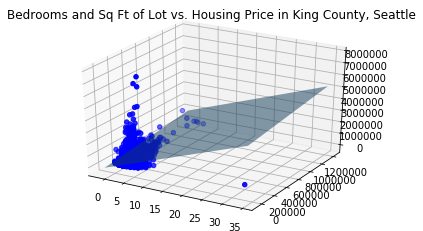

In [168]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train['bedrooms'], X_train['sqft_lot'], y_train,c='blue')

#Set axes to size of scatter data
x1 = np.array(ax.get_xlim())
y1 = np.array(ax.get_ylim())
xx, yy = np.meshgrid(x1,y1)
zz = beta_i[0]*xx + beta_i[1]*yy + beta_0

plt3d = plt.gca(projection='3d')

#Add Opacity to Plane
plt3d.plot_surface(xx, yy, zz, alpha=0.5)
plt.title("Bedrooms and Sq Ft of Lot vs. Housing Price in King County, Seattle")

plt.show()

# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [0]:
##### Your Code Here #####

# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- AMES Housing Prediction Kaggle Competition: <https://www.kaggle.com/c/house-prices-advanced-regression-techniques>
- **WRITE A BLOG POST** explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
